## Br11 Function

In [1]:
#Import tools
import apogee.tools.read as apread
import apogee.spec.plot as splot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
Lambda = splot.apStarWavegrid()

In [2]:
#Input 2M number and find associated 4 digit ID

In [3]:
#Use the ID to find the right .fits file

In [4]:
#Calculate number of visits

In [5]:
#Read in APOGEE Spectrum
visit1 = 1
spec1= apread.apStar(4586,'2M03434449+3143092',ext=1,header=False)[1 + visit1]

In [6]:
#Plot all visits and zoom in around Br11

In [7]:
#Average all visits together

In [8]:
#Find peak of shifted Br11 emission

In [9]:
#Calculate Fc
lsum= np.sum(spec1[7545:7590])/ len(spec1[7545:7590])
rsum = np.sum(spec1[7719:7762])/len(spec1[7719:7762])
Fc= (lsum+rsum)/2

In [10]:
#Calculate Flambda
Flambda=0
for i in range(7590,7719):
    segarea= (1./2.)*(Lambda[i+1]-Lambda[i])*(spec1[i+1]+spec1[i])
    Flambda = Flambda + segarea
Flambda

24954.667827939211

In [11]:
#Calculate Equivalent Width
EqW= abs((Fc-Flambda)/Fc)

upper = Lambda[7650]+(EqW/2)
lower = Lambda[7650]-(EqW/2)

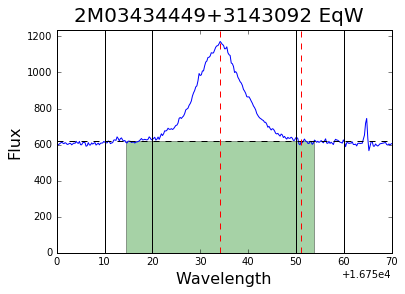

In [13]:
#Plot averaged spectrum with EqW
fig = plt.figure()
plt.plot(Lambda,spec1)
plt.axhline(y=Fc,ls='dashed',color='black')
plt.axvline(x=16760,color='black')
plt.axvline(x=16770,color='black')
plt.axvline(x=16800,color='black')
plt.axvline(x=16810,color='black')
plt.axvline(x=Lambda[7650],ls='dashed',color='r')
plt.axvline(x=16801,ls='dashed',color='r')
plt.axvspan(lower,upper,ymin=0,ymax= 0.5,facecolor='g',alpha=0.35)
fig.suptitle('2M03434449+3143092 EqW', fontsize=20)
plt.xlabel('Wavelength', fontsize=16)
plt.ylabel('Flux', fontsize=16)
plt.xlim([16750,16820])
plt.ylim([0,Fc*2])
plt.savefig('EqW Test.jpg',bbox_inches='tight')